In [2]:
from copy import deepcopy
import matplotlib.pyplot as plt
from Bio import Phylo
#import dendropy

%matplotlib inline

In [5]:
ebola_tree = Phylo.read('ebola_clean.nex', 'nexus')
ebola_tree.name = 'Ebolavirus tree'
ebola_simple_tree = Phylo.read('ebola_simple.nex', 'nexus')
ebola_simple_tree.name = 'Ebolavirus simplified tree'

ebov_2014_tree = Phylo.read('ebov_2014_clean.nex', 'nexus')
ebov_2014_tree.name = 'EBOV outbreak of 2014'
ebov_tree = Phylo.read('trees/zebov.raxml.tree', 'newick')
ebov_tree.name = 'EBOV complete tree'

In [3]:
Phylo.draw_ascii(ebola_simple_tree)
Phylo.draw_ascii(ebola_tree)

 , BDBV
 |
 | BDBV
_|
 , BDBV
 |
 |             ____________ TAFV
 |            |
 |            |                        _________________________ RESTV
 |____________|            ___________|
              |           |           |____________________________ SUDV
              |           |
              |___________|             , EBOV1995
                          |             |
                          |             |, EBOV1996
                          |_____________,|
                                        |, EBOV1994
                                        ||
                                        || EBOV1996
                                        |
                                        |, EBOV1977
                                        ||
                                        || EBOV1976
                                        ||
                                        |, EBOV2002
                                         |
                                         , E

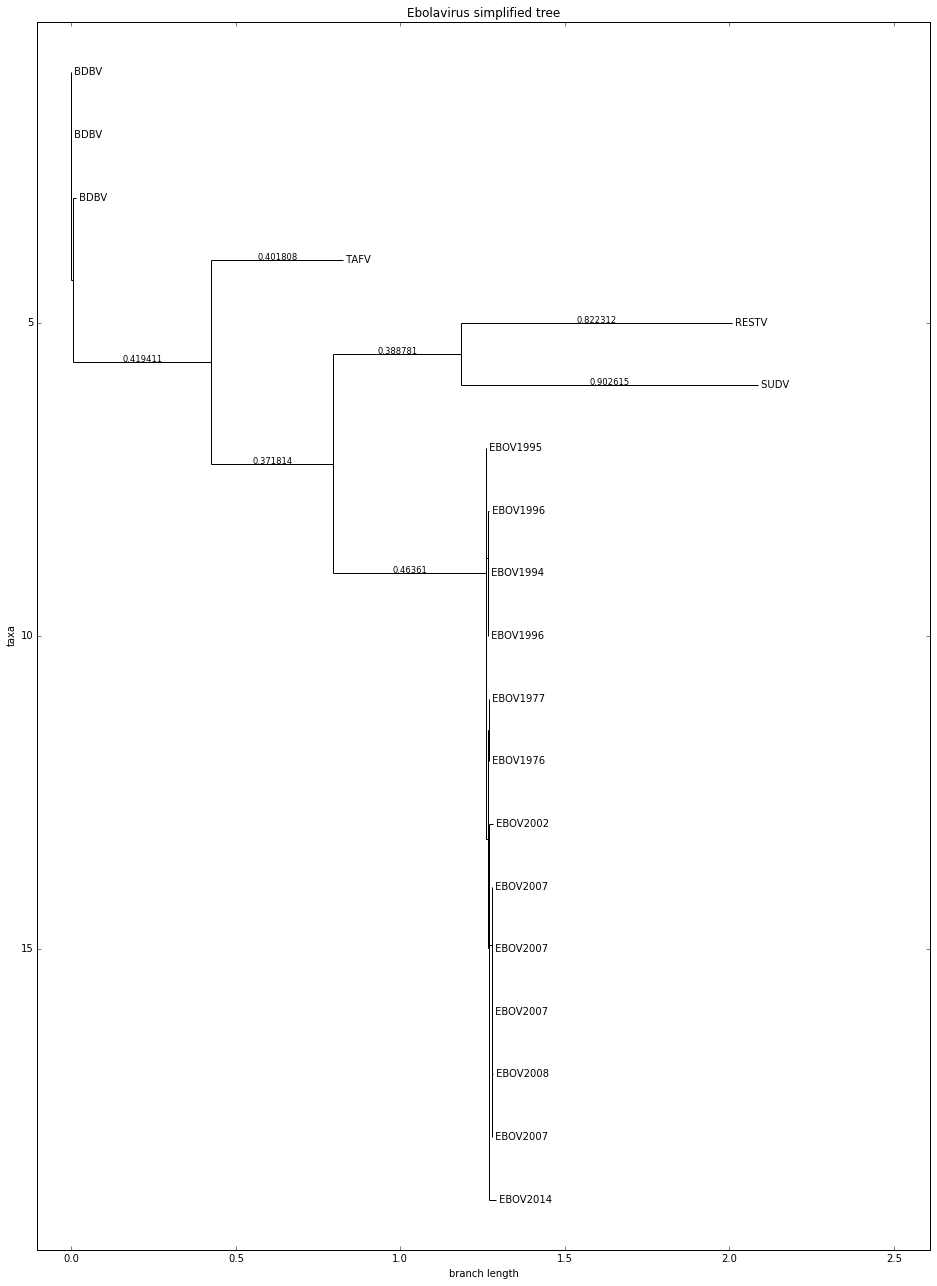

In [4]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
Phylo.draw(ebola_simple_tree, branch_labels=lambda c: c.branch_length if c.branch_length > 0.02 else None, axes=ax)

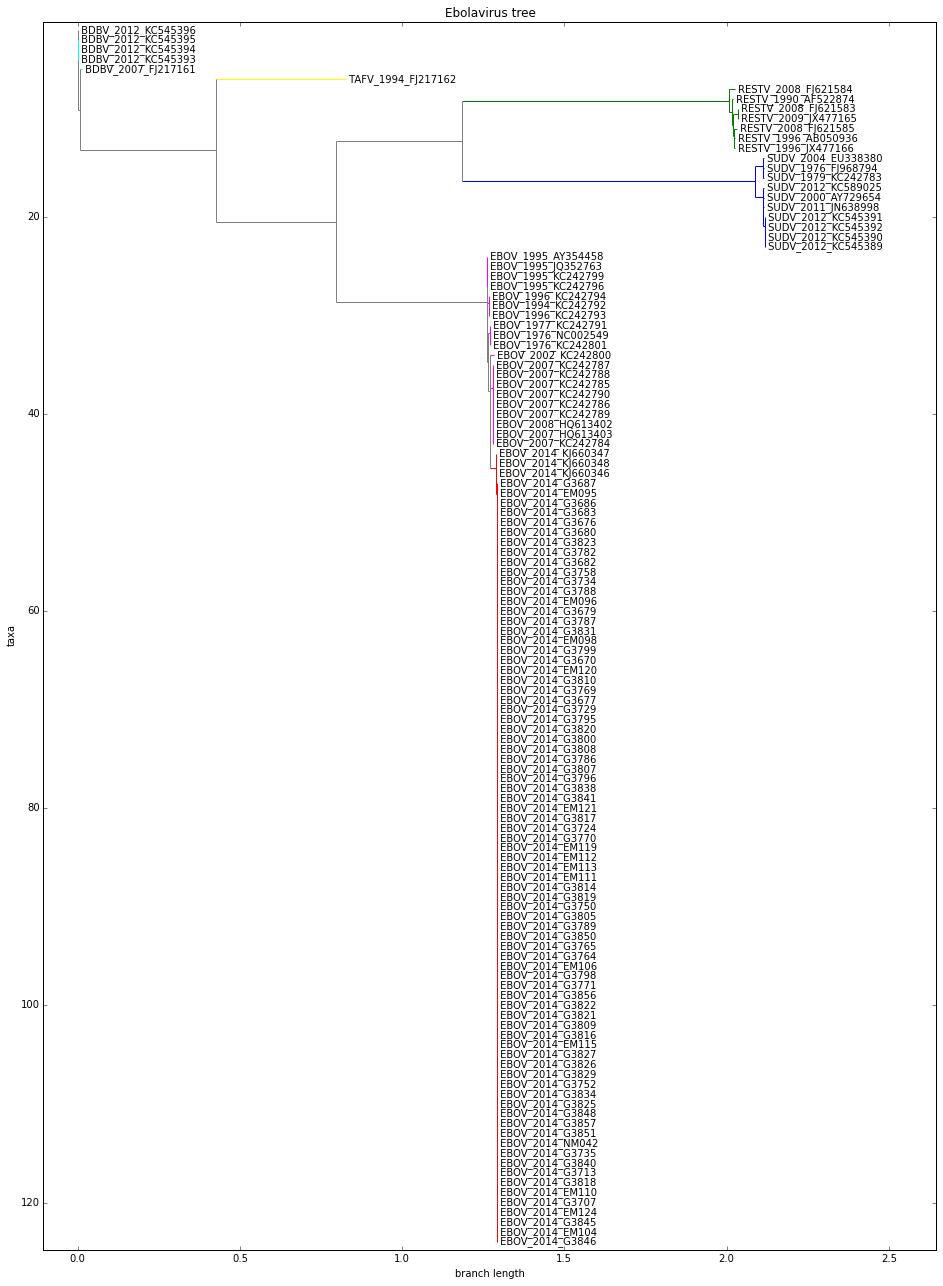

In [6]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
#Phylo.draw(ebola_tree, axes=ax)
from collections import OrderedDict
my_colors = OrderedDict({
'EBOV_2014': 'red',
'EBOV': 'magenta',
'BDBV': 'cyan',
'SUDV': 'blue',
'RESTV' : 'green',
'TAFV' : 'yellow'
})

def get_color(name):
    for pref, color in my_colors.items():
        if name.startswith(pref):
            return color
    return 'grey'

def color_tree(node, fun_color=get_color):
    if node.is_terminal():
        node.color = fun_color(node.name)
    else:
        my_children = set()
        for child in node.clades:
            color_tree(child, fun_color)
            my_children.add(child.color.to_hex())
        if len(my_children) == 1:
            node.color = child.color
        else:
            node.color = 'grey'

ebola_color_tree = deepcopy(ebola_tree)
color_tree(ebola_color_tree.root)
Phylo.draw(ebola_color_tree, axes=ax)

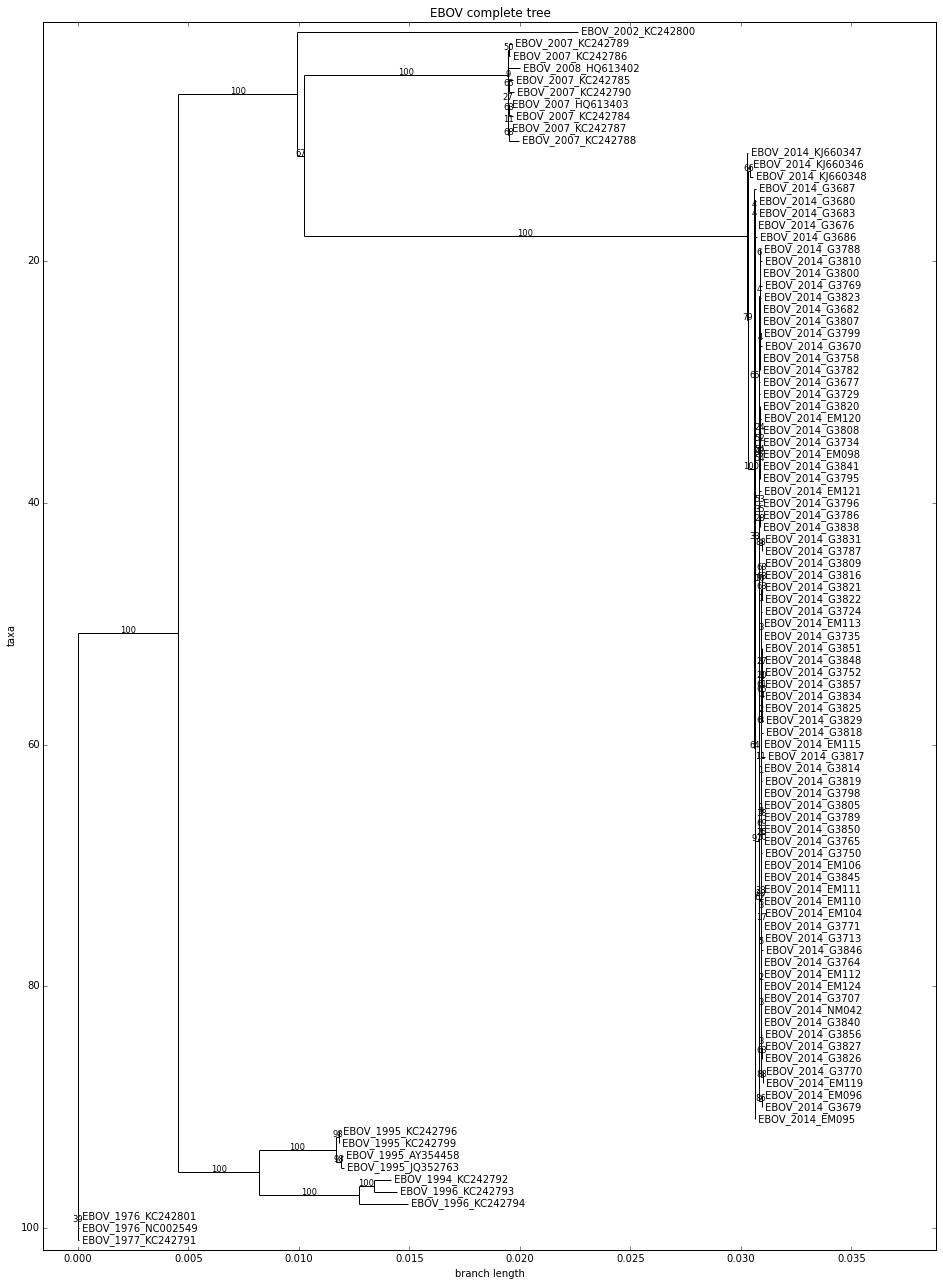

In [7]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
Phylo.draw(ebov_tree, axes=ax)

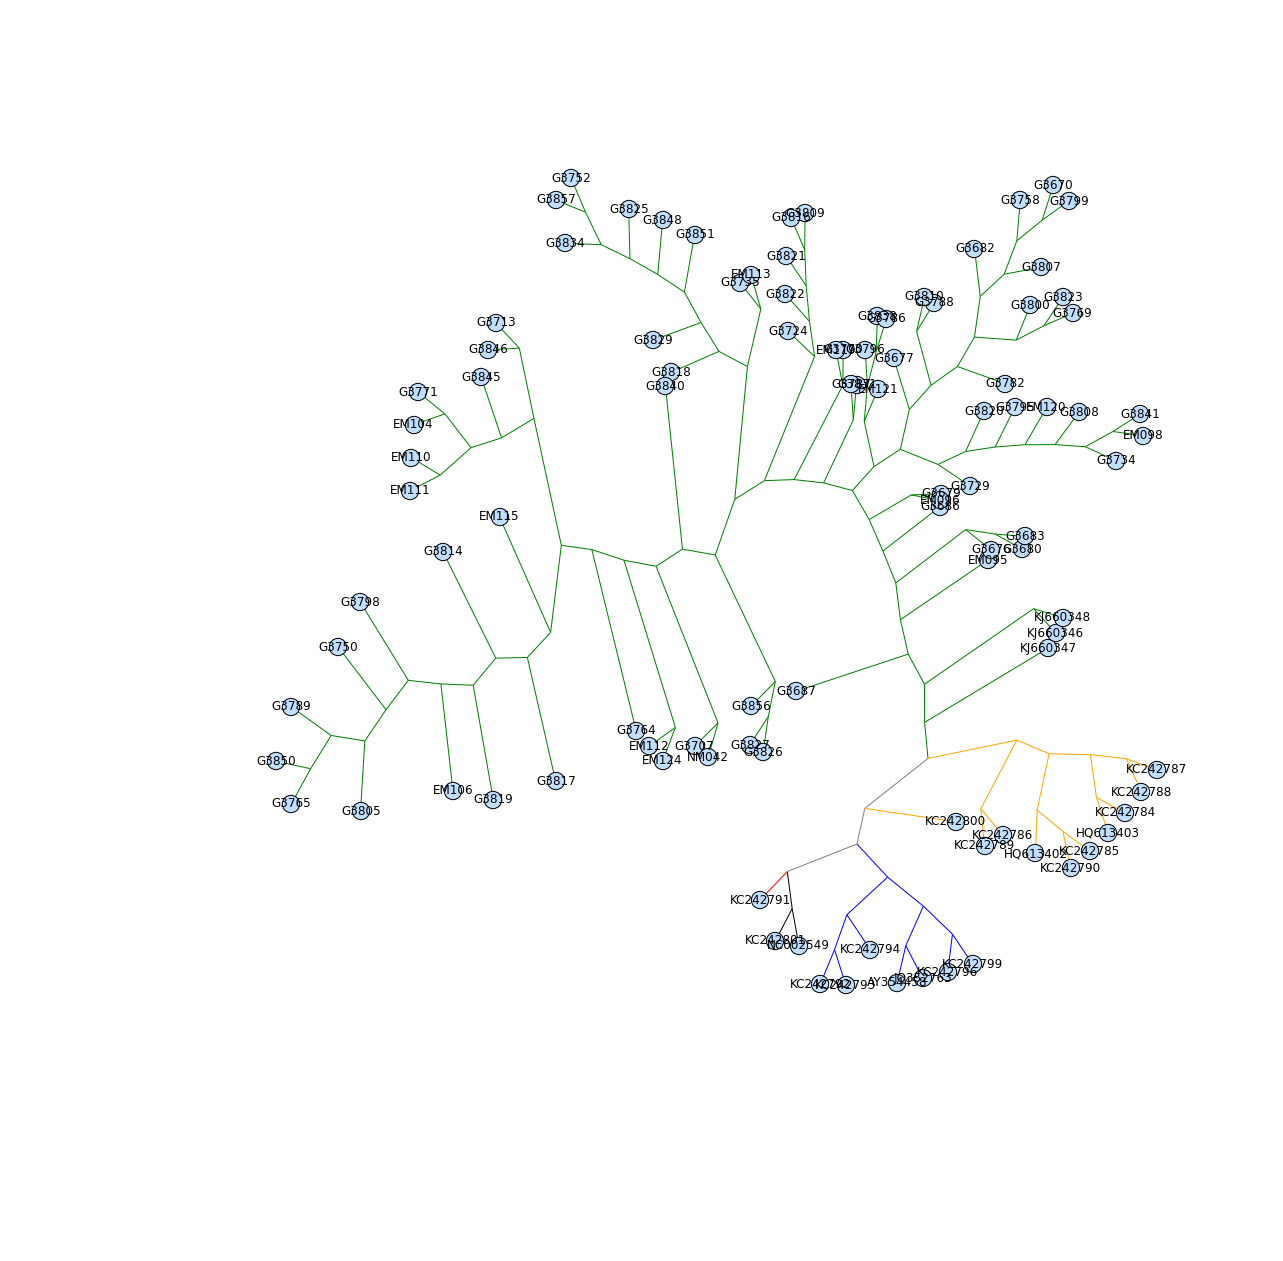

In [8]:
fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(111)
def simplify_name(n):
    if n.is_terminal:
        return n.name.split('_')[2]
    else:
        return None
    
def get_year_color(name):
    my_year = int(name.split('_')[1])
    year_color = {1976: 'black', 1976: 'black',
                  1996 : 'blue', 1995: 'blue', 1994: 'blue',
                  2002: 'orange', 2007: 'orange', 2008: 'orange',
                  2014 : 'green'}
    for year, color in year_color.items():
        if year == my_year:
            return color
    return 'red'

color_tree(ebov_tree.root, fun_color=get_year_color)
Phylo.draw_graphviz(ebov_tree, label_func=simplify_name, axes=ax, with_labels=True)

## BEAST

In [9]:
import xml.etree.ElementTree as et
tree = et.parse('beast/ZEBOV_SRD_ucln.grid.xml')
root = tree.getroot()

In [10]:
for child in root:
    print child

<Element 'taxa' at 0x7f4bb2e44c50>
<Element 'alignment' at 0x7f4bb2e7e110>
<Element 'alignment' at 0x7f4bb8d46c50>
<Element 'mergePatterns' at 0x7f4bb2f3cd10>
<Element 'patterns' at 0x7f4bb2f3ced0>
<Element 'patterns' at 0x7f4bb2f3cf50>
<Element 'constantSize' at 0x7f4bb2f3c110>
<Element 'coalescentSimulator' at 0x7f4bb2f3c150>
<Element 'treeModel' at 0x7f4bb2f3c3d0>
<Element 'gmrfSkyGridLikelihood' at 0x7f4bb2e8d250>
<Element 'discretizedBranchRates' at 0x7f4bb2e8d910>
<Element 'rateStatistic' at 0x7f4bb2e8db90>
<Element 'rateStatistic' at 0x7f4bb2e8d990>
<Element 'rateCovarianceStatistic' at 0x7f4bb2e3ded0>
<Element 'HKYModel' at 0x7f4bb2e3d950>
<Element 'HKYModel' at 0x7f4bb2e3d050>
<Element 'HKYModel' at 0x7f4bb2e3d690>
<Element 'siteModel' at 0x7f4bb2e3ddd0>
<Element 'siteModel' at 0x7f4bb2e3db50>
<Element 'siteModel' at 0x7f4bb2e3d250>
<Element 'compoundParameter' at 0x7f4bb8d8de10>
<Element 'treeLikelihood' at 0x7f4bb8d8d650>
<Element 'treeLikelihood' at 0x7f4bb8d8db50>
<Element